## Ejercicio 1 - Gestión Hotel

Implementa el ejercicio 1 de la hoja **Ejercicios psycopg2** utilizando ORMs. Para ello, implementa la clase **GestionHotel**, que debe contener métodos para realizar las siguientes operaciones:

* Creación de todas las tablas del esquema.
* Inserción de datos para todas las entidades que intervienen.
* Métodos que implementen las distintas consultas y funciones de manipulación de datos.

## Ejercicio 2 - Foro de Consultas

Queremos diseñar una clase **GestionaForo**, que gestione el acceso a una base de datos de un Foro de consultas y respuestas. El modelo tiene las siguientes especificaciones:

* Para poder participar, los usuarios se registran en el sistema con un identificador único, su nombre y correo electrónico.
* Los mensajes se agrupan en _hilos_ (también llamados conversaciones). Un hilo tiene un identificador y se debe almacenar el asunto del hilo.
* Los usuarios son de dos tipos: expertos y ocasionales. De los primeros se debe saber su página personal, mientras que es necesario almacenar el número de accesos de los usuarios ocasionales.
* Los usuarios envían mensajes al sistema para plantear preguntas o contestar a otros mensajes. Cada mensaje tiene un identificador que es único dentro de cada hilo. 
* Cuando se crea un hilo, se debe asignar un moderador, que es un usuario experto seleccionado por sus conocimientos sobre el hilo.
* Por último, los usuarios ocasionales pueden puntuar la utilidad de los lenguajes tratados en el foro. Se debe
registrar la puntuación que cada usuario ocasional da a cada lenguaje.

Como resultado de las especificaciones anteriores, hemos diseñado el siguiente Modelo Entidad-Relación

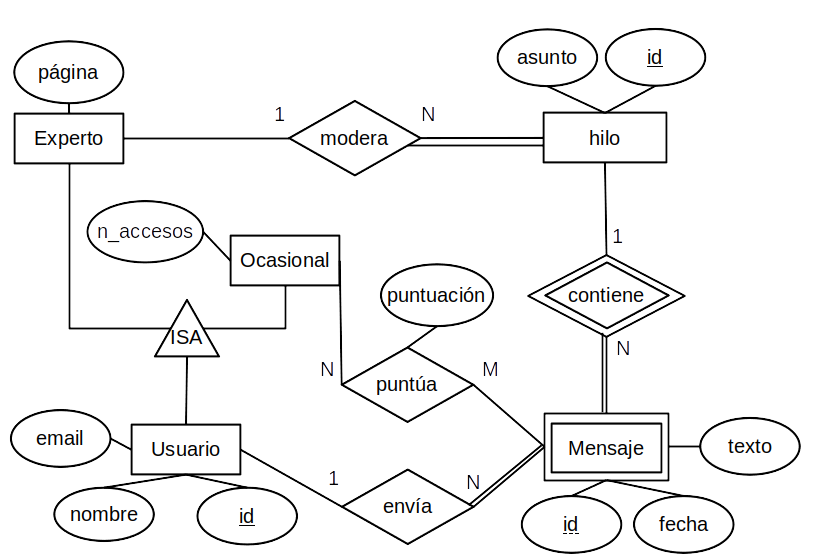

y su correspondiente modelo relacional:

* Usuario(<ins>id</ins>, nombre, email)
* Experto(<ins>id</ins>, pagina)
    - Experto.id -> Usuario.id
* Ocasional(<ins>id</ins>, nAccesos)
    - Ocasional.id -> Usuario.id
* Mensaje(<ins>idMensaje</ins>, <ins>idHilo</ins>, Texto, Fecha, idUsuario)
    - Mensaje.idUsuario -> Usuario.id
    - Mensaje.idHilo -> Hilo.id
* Hilo(<ins>id</ins>, asunto, idModerador)
    - Hilo.idModerador -> Experto.id
* Puntuacion(<ins>id_usuario</ins>, <ins>idMensaje</ins>, <ins>idHilo</ins>, puntuacion)
    - Puntuacion.id_usuario -> Usuario.id
    - Puntuacion.{idMensaje, idHilo} -> Mensaje.{idUsuario, idHilo}

Nuestra aplicación debe ser capaz de realizar las siguientes operaciones básicas:

- Crear inicialmente todas las tablas de la base de datos.
- Insertar las distintas entidades de nuestro modelo.
- Borrar una entidad en función de las claves primarias asociadas.

Además, debe implementar las siguientes funciones:

```python
def mensajes_moderados(self) -> List[Tuple[Experto, List[Hilo]]]: 
    """
    Devuelve la lista de moderadores y los mensajes de los hilos que moderan
    """
    pass

def puntuaciones_mayores(self, id_usuario: int, limit: int) -> List[Mensaje]:
    """
    Devuelve la lista de mensajes valorados por el usuario ocasional con id "id_usuario" 
    que han recibido mayor puntuacion, ordenados por su puntuación de forma decreciente. 
    Esta lista debe contener exactamente "limit" elementos. Si hay menos de "limit" mensajes
    valores, debe devolver una lista con todos los mensajes ordenados.
    """
    pass

def elimina_puntuaciones_hilo(self, id_hilo: int) -> None:
    """
    Elimina todas las puntuaciones asociadas a mensajes de un hilo.
    """
    pass

def cambiar_moderador(self, id_hilo: int, nuevo_moderador_id: int) -> None:
    """
    Cambia el moderador del hilo con id "id_hilo" a "nuevo_moderador_id".
    """
    pass

def expertos_automoderados(self) -> List[Experto]:
    """
    Devueve la lista de expertos que moderan algún hilo en el que 
    han enviado al menos un mensaje.
    """
    pass
```

Implementa dos versiones de las funciones `mensajes_moderados` y `expertos_automoderados`: una que cargue la información con una consulta SQL, y otra que lo cargue utilizando relaciones.

In [ ]:
# Datos de ejemplo

gestion_foros.inserta_usuario(1, 'Carlos Pérez', 'carlos.perez@email.com');
gestion_foros.inserta_usuario(2, 'Laura Gómez', 'laura.gomez@email.com');
gestion_foros.inserta_usuario(3, 'Ana Martínez', 'ana.martinez@email.com');
gestion_foros.inserta_usuario(4, 'Javier Ruiz', 'javier.ruiz@email.com');

gestion_foros.inserta_experto(1, 'www.carlosperez.com');
gestion_foros.inserta_experto(2, 'www.lauragomez.com');

gestion_foros.inserta_ocasional(3, 15);
gestion_foros.inserta_ocasional(4, 8);

gestion_foros.inserta_hilo(101, '¿Cómo mejorar el rendimiento en SQL?', 1);
gestion_foros.inserta_hilo(102, 'Diferencias entre SQL y NoSQL', 2);

gestion_foros.inserta_mensaje(1001, 101, 'Para mejorar el rendimiento en SQL, usa índices y optimiza las consultas.', '2025-02-01', 1);
gestion_foros.inserta_mensaje(1002, 101, 'También puedes evitar SELECT * y normalizar tus tablas.', '2025-02-02', 4);
gestion_foros.inserta_mensaje(1003, 101, 'Este mensaje es malisimo.', '2025-01-02', 4);
gestion_foros.inserta_mensaje(1004, 101, 'Te voy a banear', '2025-02-20', 1);
gestion_foros.inserta_mensaje(1001, 102, 'SQL es relacional, mientras que NoSQL es más flexible en estructura.', '2025-02-03', 3);
gestion_foros.inserta_mensaje(1002, 102, 'Depende de la aplicación, SQL es mejor para datos estructurados.', '2025-02-04', 4);

gestion_foros.inserta_puntuacion(1, 1001, 101, 5);
gestion_foros.inserta_puntuacion(1, 1002, 101, 7);
gestion_foros.inserta_puntuacion(2, 1002, 101, 8);
gestion_foros.inserta_puntuacion(3, 1002, 102, 5);
gestion_foros.inserta_puntuacion(4, 1001, 102, 3);

## Ejercicio 3 - Reserva de Alojamientos (DIFÍCIL)

Queremos diseñar una clase **GestionAlojamientos**, que gestione el acceso a una base de datos de una web de apartamentos turísticos y hoteles. El modelo tiene las siguientes especificaciones:

* Las personas pernoctan en alojamientos con una fecha de entrada y otra de salida. Por cada reserva (tanto de hoteles como de apartamentos), se almacena la lista de personas que se alojan. En el caso de las reservas de hotel, también se almacena el número de habitación en el que se encuentran alojados.
* Los apartamentos tienen un dueño asociado, del cual solo nos interesa guardar el NIF y el nombre (al igual que para los clientes).
* Hoteles y apartamentos llegan a acuerdos para derivar clientes cuando están completos.
* Las agencias de viajes disponen de ofertas con precios especiales sobre hoteles.

Como resultado de las especificaciones anteriores, hemos diseñado el siguiente Modelo Entidad-Relación

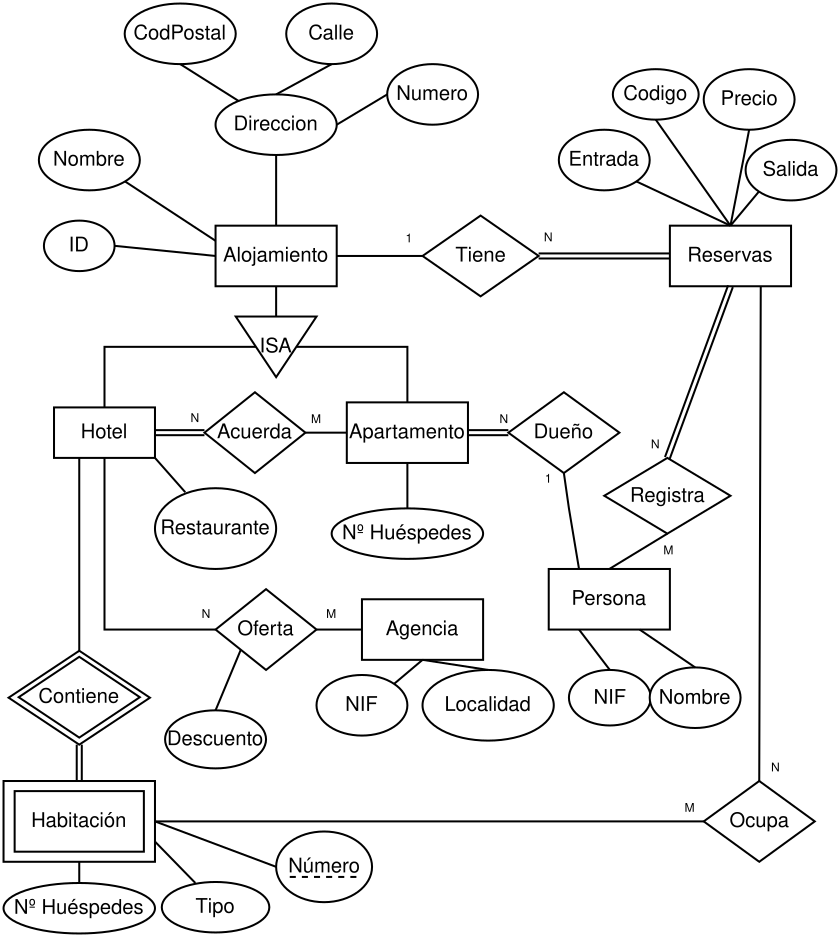

con su correspondiente modelo relacional:

* Alojamiento(<ins>ID</ins>, nombre, calle, numero, codPostal)
* Persona(<ins>NIF</ins>, nombre)
* Agencia(<ins>NIF</ins>, localidad)
* Hotel(<ins>ID</ins>, restaurante, NIF_agencia)
    - Hotel.ID -> Alojamiento.ID
    - Hotel.NIF_agencia -> Agencia.NIF
* Habitacion(<ins>ID_hotel</ins>, <ins>numero</ins>, n_huespedes, tipo)
    - Habitacion.ID_hotel -> Hotel.ID
* Apartamento(<ins>ID</ins>, n_huespedes, NIF)
    - Apartamento.ID -> Alojamiento.ID
    - Apartamento.NIF -> Persona.NIF
* Reserva(<ins>codigo</ins>, ID_alojamiento, precio, entrada, salida)
    - Reserva.ID_alojamiento -> Alojamiento.ID
    - Reserva.NIF_persona -> Persona.NIF
* Huesped(<ins>NIF</ins>, <ins>codigo</ins>):
    - Huesped.NIF -> Persona.NIF
    - Huesped.codigo -> Reserva.codigo
* Acuerda(<ins>ID_hotel</ins>, <ins>ID_apartamento</ins>)
    - Acuerda.ID_hotel -> Hotel.ID
    - Acuerda.ID_apartamento -> Apartamento.ID
* Oferta(<ins>NIF_agencia</ins>, <ins>ID_hotel</ins>, descuento)
    - Oferta.NIF_agencia -> Agencia.NIF
    - Oferta.ID_hotel -> Hotel.ID

Nuestra aplicación debe ser capaz de realizar las siguientes operaciones básicas:

- Crear inicialmente todas las tablas de la base de datos.
- Insertar las distintas entidades de nuestro modelo.
- Borrar una entidad en función de sus claves primarias asociadas.

Además, debe implementar las siguientes funciones:

```python
def hoteles_agencia_localidad(self, localidad: str) -> List[str]: 
    """
    Devuelve el nombre de todos los hoteles tales que existe una agencia en la localidad dada que ofrece alguna oferta en ese hotel.
    """
    pass

def restaurantes_codigo_postal(self, codigo_postal: str) -> List[str]:
    """
    Devueve la lista de restaurantes asociadas a un código postal.
    """
    pass

def grandes_tenedores(self) -> List[Persona]:
    """
    Devueve la lista de personas que son al menos dueños de un total de 5 apartamentos.
    """
    pass

def elimina_alojamiento_ilegal(self, id_alojamiento) -> List[str]:
    """
    Dado el ID de un alojamiento ilegal, elimina ese alojamiento de la base de datos y sus datos relacionados; y devuelve la lista de NIFs de personas que tenían una reserva de ese alojamiento (a partir de hoy). Tenéis dos opciones para eliminar toda la información relacionada (os recomiendo probar las dos):

    - Podéis fijar "ON DELETE CASCADE" al construir la tabla en las foreign keys (investigad cómo se especifica). Cuando borréis el alojamiento correspondiente, comprobad que las eliminaciones se propagan.
    - Otra opción es operar directamente desde la ORM.
    """

def mover_reservas(self, codigo_reserva: List) -> None: 
    """
    Mueve la reserva especificada (de un hotel) a un apartamento que tenga una habitación disponible en las fechas especificadas. El apartamento debe tener un convenio previo con el hotel. Además, el apartamento debe permitir un número de huespedes superior al número de huespedes asociado a la reserva.  En caso de no haber ningún apartamento disponible con las características requeridas, lanza la excepción propia 'ApartamentoNotFound'.
    """
    pass
```

In [ ]:
# Datos de ejemplo

gestion_alojamientos.inserta_alojamiento(1, 'Hotel Sol', 'Av. del Mar', 23, '28001');
gestion_alojamientos.inserta_alojamiento(2, 'Hotel Luna', 'Calle Estrella', 45, '28002');
gestion_alojamientos.inserta_alojamiento(3, 'Apartamento Playa', 'Calle Arena', 12, '11011');
gestion_alojamientos.inserta_alojamiento(4, 'Apartamento Centro', 'Gran Vía', 101, '28013');

gestion_alojamientos.inserta_persona('12345678A', 'Carlos Pérez');
gestion_alojamientos.inserta_persona('87654321B', 'Laura Gómez');
gestion_alojamientos.inserta_persona('56781234C', 'Ana Martínez');

gestion_alojamientos.inserta_agencia('A001', 'Madrid');
gestion_alojamientos.inserta_agencia('A002', 'Barcelona');

gestion_alojamientos.inserta_hotel(1, "Veratus", 'A001');
gestion_alojamientos.inserta_hotel(2, "Diverxo", 'A002');

gestion_alojamientos.inserta_habitacion(1, 101, 2, 'Doble');
gestion_alojamientos.inserta_habitacion(1, 102, 1, 'Individual');
gestion_alojamientos.inserta_habitacion(2, 201, 4, 'Familiar');
gestion_alojamientos.inserta_habitacion(2, 202, 2, 'Doble');

gestion_alojamientos.inserta_apartamento(3, 4, '12345678A');
gestion_alojamientos.inserta_apartamento(4, 2, '87654321B');

gestion_alojamientos.inserta_reserva(1001, 1, 150.00, '2025-06-01', '2025-06-07', '12345678A');
gestion_alojamientos.inserta_reserva(1002, 3, 200.00, '2025-07-01', '2025-07-10', '87654321B');

gestion_alojamientos.inserta_huesped('12345678A', 1001);
gestion_alojamientos.inserta_huesped('87654321B', 1002);

gestion_alojamientos.inserta_acuerda(1, 3);
gestion_alojamientos.inserta_acuerda(2, 4);

gestion_alojamientos.inserta_oferta('A001', 1, 10.0);
gestion_alojamientos.inserta_oferta('A002', 2, 15.0);